   # Introduction to Artificial Neural Networks with Keras
   
## From Biological to Artificial Neurons

Artificial Neural Networks were inspired by biological neurons. First introduced back in 1943, but entered a long winter as other methods worked better. We are now witnessing another wave of interest in ANNs. This time, there are a few good reasons to believe that this wave is different and that it will have a much more profound impact on our lives:

- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.
- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore's Law, but also thanks to the gaming industry, which has produced powerful GPU cards by the millions.
- The training algos have been improved. To be fair they are only slighly different from the ones used in the 1990s, but these relatively small tweaks have a huge positive impact.
- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algos were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (or when it is the case, they are usually fairly close to the global optimum).
- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding towards them, resulting in more and more progress, and even more amazing products.

## Biological Neurons

Before discussing artificial neurons, let's take a quick look at a biological neuron. It is an unusual-looking cell mostly found in animal cerebral cortexes, composed of a *cell body* containing the nucleus and most of the cell's complex components, and many branching extensions called *dendrites*, plus one very long extension called the *axon*. The axon's length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called *telodendria*, and at the tip of these branches are minuscule structures called *synaptic terminals* (or simply *synapses*), which are connected to the dendrites (or directly to the cell body) of other neurons. Biological neurons receive short electrical impluses called *signals* from other neurons via these synapes. When a neuron receives a sufficient number of signals from other neurons within a few milliseconds, it fires its own signals.

![alt text](neuron.PNG "bio neuron")

Thus, individual biological neurons seem to behave in a rather simple way, but they are organized in a vast network of billions of neurons, each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a vast network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants. The architecture of biological neural networks is still the subject of active research, but some parts of the brain have been mapped, and it seems that neurons are often organized in consecutive layers.

## Logical Computations with Neurons

McCulloch and Pitts proposed a very simple model of the biological neuron, which later became known as an *artificial neuron*: it has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its output when more than a certain number of its inputs are active. They showed that even with such a simplified model it is possible to build a network of artificial neurons that computes any logical proposition you want.

## The Perceptron

The *Perceptron* is one of the simplest ANN architecturesm invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU): the inputs and output are now numbers rather than binary on/off values and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs ($z = w_1x_1 + w_2x_2 + ... + w_nx_n = x^tw$), then applies a *step function* to that sum and outputs the results: $h_w(x) = step(z)$ , where $z = x^tw$.

![alt text](TLU.PNG "TLU")


A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM). 

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layers (i.e., its input neurons), it is called a *fully connected* layer or a *dense leyaer*. To represent the fact that each input is sent to every TLU, it is common to draw special passthrough neurons called *input neurons*: they just output whatever input they are fed. All the input neurons form the *input layer*. Moreover, an extra bias feature is generally added ($x_0 = 1$): it is typically represented using a special type of neuron called a *bias neuron*, which just outputs 1 all the time. 
A Perceptron with two inputs and three outputs is represented below.

![alt text](perceptron.PNG "perceptron")

This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

Thanks to the magic of linear algebra, it is possible to efficiently compute the outputs of a layer of artificial neurons for several instances at once by using the equation below:

$$ h_{W,b}(X) = \phi(XW + b)$$

- As always, X represents the matrix of input features. It has one row per instance, one column per feature.
- The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artifical neuron in the layer.
- The bias vector b contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.
- The function $\phi$ is called the *activation function*: when the artificial neurons are TLUs, it is a step function (but we will discuss other activation functions shortly).

So how is a Perceptron trained? The Perceptron training algo proposed was largely inspired by *Hebb's rule* (when a biological neuron often triggers another neuron, the connection between these two neurons grows stronger or "Cells that fire together, wire together"). The connection weight between two neurons is increased whenever they have the same output. Perceptrons are trained using a variant of this rule that takes into account the error made by the netwkork; it reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed the correct prediction. The rule is shown in the equation below:

$$ w_{i,j}^{(next step)} = w_{i,j} + \eta(y_j - \hat{y_j})x_i $$

where:

- $ w_{i,j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.
- $x_i$ is the $i^{th}$ input value of the current training instance.
- $\hat{y_j}$ is the output of the $j^{th}$ output neuron for the current training instance.
- $\eta$ is the learning rate.

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, it was demonstrated that this algo would converge to a solution. This is called the *Perceptron convergence theorem*.

Scikit-Learn provides a `Perceptron` class that implements a single TLU network. It can be used pretty much as you would expect.   

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa? 0 or 1

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


C:\Users\levka\Anaconda3\envs\ds001\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


You may have noticed the fact that the Perceptron learning algo strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn's `Perceptron` class is equivalent to using a `SGDClassifier` with the following hyperparameters: `loss="perceptron"`,`learning_rate="constant"`,`eta0=1` (the learning rate), and `penalty=None` (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

In the 1969 monograph titled *Perceptrons*, a number of serious weaknesses of Perceptrons were highlighed, in particular the fact that they are incapable of solving some trivial problems (e.g. the *Exclusive OR (XOR)* classification problem. 

However, it turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a *Multi-Layer Perceptron* (MLP). 

## Multi-Layer Perceptron and Backpropagation

An MLP is composed of one (passtrhough) *input layer*, one or more layers of TLUs called *hidden layers*, and one final layer of TLUs called the *output layer* (see figure below). The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

![alt text](MLP.PNG "MLP")

**Note**:

The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a *feedforward neural network* (FNN).

When an ANN contains a deep stack of hidden layers, it is called a *deep neuroal network* (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. However, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train MLPs, without success. In 1986 a groundbreaking paper was published introducing the *backpropagation* training algorithm, which is still used today. In short, it is simply Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network's error with regards to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

**Note**:

Automatically computing gradients is called *automatic differentiation*, or autodiff. There are various autodiff techniques, with different pros and cons. The one used by backpropagation is called *reverse-mode autodiff*. It is fast and precise, and is well suited when the function to differentiate has many variables (e.g. connection weights) and few outputs (e.g. one loss).

Let's run through this algo in a bit more detal:

- It handles one mini-batch at a time (for example containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an *epoch*.
- Each mini-batch is passed to the network's input layer, which just sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the *forward pass*: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
- Next the algo measures the network's output error (i.e. it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
- Then it computes how much each output connection contributed to the error. This is done analytically by simply applying the *chainrule*, which makes this step fast and precise.
- The algo then measures how much of these error contributions came from each connection in the layer below, again using the chain rule -- and so on until the algo reaches the input layer. As we explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the neame of the algorithm).
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the nextwork, using the error gradients it just computed.

This algo is so important, it's worth summarizing again: for each training instance the backprop algo first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each conection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

**Caution**:

It is important to initialize all the hidden layers' connection weights randomly, or else training will fail. For example, if you initialize all weights and biases t ozero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won't be too smart. If instead you randomly initialize the weights, you *break the symmetry* and allow backpropagation to train a diverse team of neurons.

In order for this algo to work properly, the authors made a key change to the MLP's architecture: they replaced the step function with the logistic function, $\sigma(z) = 1 / (1 + exp(-z))$. This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywehre, allowing Gradient Descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other *activation functions*, not just the logistic function. Two other popular activation function are:

*The hyperbolic tangent function $ tan(z) = 2\sigma(2z)-1$

Just like the logistic function it is S-shaped, continuous, and differentiable, but its output value ranges from -1 to 1 (instead of 0 to 1), which tends to make each layer's output more or less centered aroung 0 at the beginning of training. This often helps speed up convergence.

*The Rectified Linear Unit function:* $ReLU(z) = max(0,z)$

It is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for z < 0. However, in practice it works very well and has the advantage of being fast to compute. Most importantly, the fact that it does not have a maximum output value also helps reduce some issues during Gradient Descent.

These popular activation functions and their derivatives are represented in the figure below.

Why do we need activation functions in the first place? Well, if you chan several linear transformations, all you get is a linear transformation. For example, say $f(x) = 2x + 3$ and $g(x) = 5x - 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x -1) + 3 = 10x +1$. So if you don't have some non-linearity between layers, then even a deep stack of layers is equivalent to a single layer: you cannot solve very complex problems with that.


![alt text](activationfuns.PNG "activationfuns")


But what can we do with them?

# Regression MLPs

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g. the price of a house given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e. to predict multiple values at once), you need one output neuron per output dimension. FOr example, to locate the center on an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more number: the width and the height of the object. So you end up with 4 output neurons.

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. However, if you want to guarantee that the output will always be positive, then you can use the ReLU activation function, or the *softplus* activation function in the output layer. Finally, if you want to guarantee that the predictions will fall within a give range of values, then you can use the logistic function or the hyperbolic tangent, and scale the labels t othe appropriate range: 0 to 1 for the logistic, or -1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

**Note**:

The Huber loss is quadratic when the error is smaller than a threshold $\delta$ (typically 1), but linear when the error is larger than $\delta$. This makes it less sensitive to outliers than the mean squared error, and it is often more precise and converges faster than the mean absolute error.

Typical Regression MLP Architecture:

|Hyperparameter| Typical Value|
|--------------|--------------|
|# input neurons| One per input feature (e.g., 28 x 28 = 784 for MNIST)|
|# hidden layers| Depends on the problem. Typically 1 to 5.|
|# neurons per hidden layer |Depends on the problem. Typically 10 to 100.|
|# output neurons| 1 per prediction dimension|
|Hidden activation| ReLU (or SELU, see Chapter 11)|
|Output activation| None or ReLU/Softplus (if positive outputs) or Logistic/Tanh (if bounded outputs)|
|Loss function| MSE or MAE/Huber (if outliers)|

# Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. Obviously, the estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneosly predicts whether it is an urgent or non-urgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probabiity that the email is spam and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to one. This lets the model output any combination of labels: you can have non-urgent ham, urgent ham, non-urgent spam, and perhaps even urgent spam.

If each instance can belong only to a single class, out of 3 or more possible classes (e.g. classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the *softmax* activation function for the whole output layer (see figure below). The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to one (which is required if the classes are exclusive). This is called multiclass classification.

![alt text](class.PNG "class")

Regarding the loss function, since we are predicting probability distributions, the cross-entropy (also called the log loss) is generally a good choice.

Typical Classification MLP Architecture


|Hyperparameter |Binary classification| Multilabel binary classification| Multiclass classification|
|---------------|---------------------|---------------------------------|--------------------------|
|Input and hidden layers| Same as regression| Same as regression| Same as regression|
|# output neurons| 1 |1 per label| 1 per class|
|Output layer activation| Logistic| Logistic| Softmax|
|Loss function| Cross-Entropy| Cross-Entropy| Cross-Entropy|

# Implementing MLPs with Keras

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks. TensorFlow now comes bundled with its own Keras implementation called tf.keras. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features. For this reason, we will use tf.keras in this book.

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
keras.__version__

1.14.0


'2.2.4-tf'

## Building an Image Classifier Using the Sequential API

First, we need to load a dataset. We will tackle *Fashion MNIST*, which is a drop-in replacement of MNIST. It has the exact same format as MNIST, but the images represent fashion items rather than handwritten digits, so each class is more diverse and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

### Using Keras to Load the Dataset

Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, the original California housing dataset, and more. Let's load Fashion MNIST:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 29x29 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (0 - 255) rather than floats (0.0 to 255.0). Here is the shape and data type of the training set:

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

Note that the dataset is already split into a training set and a test set, but there is no validation set, so let's create one. Moreover, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we just scale the pixel intensitiesdown to the 0-1 range by dividing them by 255.0 (this also converts them to floats):

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. However, for Fashion MNIST, we need the list of class names to know what we are dealing with:

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the Model Using the Sequential API

Now let's build the neural network. Here is a classification MLP with two hidden layers:

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

W0822 14:16:20.422316  5640 deprecation.py:506] From C:\Users\levka\Anaconda3\envs\ds001\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Lets' go through this code line by line:

- The first line creates a `Sequential` model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.
- Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is simply to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1,1). This layer does not have any parameters., it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape`: this does not include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `shape=[28,28]`
- Next we add a `Dense` hidden layer with 300 neurons. It will use the ReLU activation function. Each `Dense` layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes $ h_{W,b}(X) = \phi(XW + b)$.
- Next we add a second `Dense` hidden layer with 100 neurons, also using the ReLU activation function.
- Finally, we add a `Dense` output layer with 10 neurons (one per class) using the softmax activation function (because the classes are exclusive).

Instead of adding the layers one by one as we did, you can pass a list of layers when creating the `Sequential` model:

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

The model's `summary()` method displays the model's layers, including each layer's name (which is automatically generated unless you set it when creating the layer), its output shape (`None` means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters:

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that `Dense` layers oftan have a lot of parameters. This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. 

You can easily get a model's list of layers, to fetch a layer by its index, or you can fetch it by name:

In [14]:
model.layers

In [15]:
model.layers[1].name

'dense_3'

In [16]:
model.get_layer('dense_3').name

'dense_3'

All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` method. For a `Dense` layer, this includes both the connection weights and the bias terms:

In [20]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[-0.07210173,  0.01075655,  0.07025214, ...,  0.03057516,
         0.02013434,  0.07283032],
       [ 0.02029274, -0.05428267, -0.03157067, ..., -0.03966312,
         0.0074676 ,  0.03257822],
       [-0.0051745 , -0.02604797, -0.01225365, ...,  0.0413438 ,
         0.04252189,  0.06783693],
       ...,
       [-0.0599126 ,  0.02932967,  0.03958181, ..., -0.05207442,
        -0.07022012,  0.05089667],
       [-0.0238829 , -0.03569435,  0.04875075, ...,  0.03376319,
         0.02576625, -0.00878231],
       [ 0.03379595, -0.07154194,  0.05133651, ...,  0.03007802,
         0.06323038, -0.02019661]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

Notice that the `Dense` layer initialized the connection weights randomly (which is needed to break symmetry, as we discussed earlier), and the biases were just initialized to zeros, which is fine. If yo ever want to use a diffrent initialization method, you can set `kernel_initializer` (*kernel* is another name for the matrix of connection weights) or `bias_initializer` when creating the layer.

**Note**:

The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify the `input_shape` when creating the first layer in a `Sequential` model. However, if you do not specify the input shape, it's okay: Keras will simply wait until it knows the input shape before it actually builds the model This will happen either when you feed it actual data (e.g. during training), or when you call its `build()` method. Until the model is really build, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model), so if you know the input shape when creating the model, it is best to specify it.

### Compiling the Model

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can also specify a list o f extra metrics to compute during training and evaluation:

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

This requires some explanation. First, we use the `sparse_categorical_crossentropy` loss because we have sparse labels (i.e. for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors), then we would need to use the `"categorical_crossentropy"` loss instead. If we were doing binary classification (with one or more binary labels), then we would use the `"sigmoid"` activation function in the output layer instead of the `"softmax"` activation function, and we would use the `"binary_crossentropy"` loss.

Secondly, regarding the optimizer, `"sgd"` simply means that we will train the model using simple Stochastic Gradient Descent. 

Finally, since this is a classifier, it's useful to measure its `"accuracy"` during training and evaluation.

### Training and Evaluating the Model

Now the model is ready to be trained. For this we simply need to call its `fit()` method. We pass it the input features `(X_train)` and the target classes `(y_train)`, as well as the number of epochs to train. We also pass a validation set (this is optional): Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs: if the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set):

In [25]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.7245 - acc: 0.7587 - val_loss: 0.5127 - val_acc: 0.8290
Epoch 2/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4935 - acc: 0.8275 - val_loss: 0.4530 - val_acc: 0.8478
Epoch 3/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4478 - acc: 0.8430 - val_loss: 0.4227 - val_acc: 0.8568
Epoch 4/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4190 - acc: 0.8528 - val_loss: 0.4063 - val_acc: 0.8636
Epoch 5/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3979 - acc: 0.8607 - val_loss: 0.4076 - val_acc: 0.8596
Epoch 6/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3822 - acc: 0.8659 - val_loss: 0.3849 - val_acc: 0.8642
Epoch 7/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3677 - acc: 0.8703 - val_loss: 0.3

And that's it, the neural network is trained. At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, the loss and accuracy (or any other extra metrics you asked for), both on the training set and the validation set. You can see that the training loss went down, which is a good sign, and the validation accuracy reached 89% after 30 epochs, not too far from the training accuracy, so there does not seem to be much overfitting going on.

**Note**:

Instead of passing a validation set using the `validation_data` argument, you could instead set `validation_split` to the ratio of the training set that you want Keras to use for validation (e.g. 0.1).

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set hte `class_weight` argument when calling the `fit()` method, giving a larger weight to underrepresented classes, and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights instead, you can set the `sample_weight` argument (it supersedes `class_weight`). This could be useful for example if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple. 

The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on he validation set (if any). If you create a Pandas DataFrame using this dictionary and call its `plot()` method, you get the learning curves:

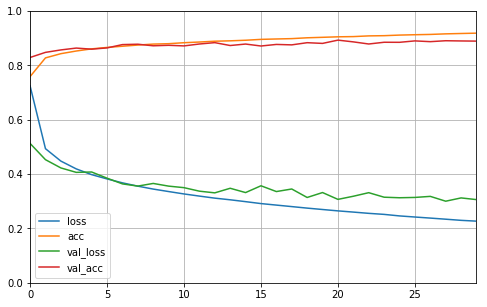

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

You can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting. In this particular case, the model performed better on the validation set than on the training set at the beginning of training: this sometimes happens by chance (especially when the validation set is fairly small). However, the training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It's as simple as calling the `fit()` method again, since Keras just continues training where it left off.

If you are not satisfied with the performance of your model, you should go back and tune the model's hyperparameters, for example the number of layers, the number of neurons per layer, the types of activation functions we use for each hidden layer, the number of training epochs, the batch size (it can be set in the `fir()` method using the `batch_size` argument, which defaults to 32). 

Once you are satisfied with your model's validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deplou the model to production. You can easily do this using the `evaluate()` method (it also supports several other arguments, such as `batch_size` or `sample_weight`):

In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 89.8539 - acc: 0.8101


[89.853906980896, 0.8101]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set. Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

### Using the Model to Make Predictions

Next, we can use the model's `predict()` method to make predictions on new instances. Since we don't have actual new instances, we will just use the first 3 instances of the test set:

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

As you can see for each instance the model estimates one probability per class, from class 0 to class 9. If you only care about the class with the highest estimated probability (even if the prob is quite low) then you can use the `predict_classes()` method instead:

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [32]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

And the classifier actually classified all three images correctly:

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Now you know how to build, train, evaluate and use a classification MLP using the sequential API. But what about regression?

## Building a Regression MLP Using the Sequential API

Let's switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn's `fetch_california_housing()` function to load the data: this dataset is simpler than the one used in chapter 2 since it contains only numerical features and there is no missing value. After loading the data, we split it into training set, a validation set and a test set, and we scale all the features:

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

Building, training, evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[3:]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 46us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 38us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=================

As you can see, the Sequential API is quite easy to use. However, altough sequential models are extremely common, it is sometimes useful to build NN with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the Functional API.

## Building Complex Models Using the Functional API

One example of a non-sequential neural network is a *Wide & Deep* Neural network. This NN architecture was introduce in a 2016; it connects all or part of the inputs directly to 

p 304